# Decision Tree Classification
---
> This is going to be a tough one. I've been tasked with generating a decision tree based off of some crappy data. Wish me luck

In [85]:
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from six import StringIO
import pydotplus
from IPython.display import Image

In [116]:
training_data = pd.DataFrame({"ID": np.arange(1, 17),
                             "AgeofDriver": [27, 19, 44, 31, 38, 51, 67, 35, 76, 47,49,21,29,25,55,30],
                             "AgeofLicence": [2,2,21,7,13,30,49,5,1,18,3,4,7,4,32,11],
                             "AgeofPolicy": [3,0,5,7,8,14,11,1,11,5,0,4,2,2,14,0],
                             "UnspentConvictions": [0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0],
                             "1stPartyClaims": [1,2,0,0,2,0,0,0,1,0,0,1,0,0,1,0],
                             "3rd artyClaims": [0,0,0,0,1,4,2,0,1,1,0,3,0,2,0,0],
                             "NoClaimsProtection": np.array([1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1], dtype=bool),
                             "NoClaims": np.array([1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0], dtype=bool),
                             "Experienced": np.array([0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,1], dtype=bool),
                             "Good": np.array([0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1], dtype=bool)}).set_index("ID")

In [138]:
X, y = training_data, training_data.iloc[:, 7:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
classifier = tree.DecisionTreeClassifier(random_state=13)
classifier_fit = classifier.fit(X_train, y_train)

In [112]:
test_set = pd.DataFrame({"ID": np.arange(17, 25),
                             "AgeofDriver": [25,37,19,44,62,48,23,56],
                             "AgeofLicence": [8,17,0,25,35,30,4,36],
                             "AgeofPolicy": [3,11,0,12,9,1,4,0],
                             "UnspentConvictions": [1,0,0,1,0,0,0,1],
                             "1stPartyClaims": [1,0,2,0,0,0,1,0],
                             "3rd artyClaims": [0,2,0,0,1,0,3,1],
                             "NoClaimsProtection": np.array([0,1,0,0,0,1,0,0], dtype=bool),
                             "NoClaims": np.empty(8).fill(False),
                             "Experienced": np.empty(8).fill(False),
                             "Good": np.empty(8).fill(False)}).set_index("ID")


In [139]:
accuracy = metrics.accuracy_score(classifier.predict(X_test), y_test)
accuracy

0.5

In [140]:
y_preds = classifier.predict(test_set)

np.vectorize({False: "N", True: "Y"}.get)(y_preds)

array([['Y', 'Y', 'Y'],
       ['N', 'Y', 'Y'],
       ['Y', 'Y', 'Y'],
       ['Y', 'Y', 'Y'],
       ['Y', 'Y', 'Y'],
       ['N', 'Y', 'Y'],
       ['Y', 'Y', 'Y'],
       ['Y', 'Y', 'Y']], dtype='<U1')

In [141]:
y_preds = pd.DataFrame(np.vectorize({False: "N", True: "Y"}.get)(y_preds),
                      columns=test_set.columns[7:])
y_preds['ID'] = test_set.index
y_preds = y_preds.set_index('ID')
y_preds

,NoClaims,Experienced,Good
ID,,,
17,Y,Y,Y
18,N,Y,Y
19,Y,Y,Y
20,Y,Y,Y
21,Y,Y,Y
22,N,Y,Y
23,Y,Y,Y
24,Y,Y,Y


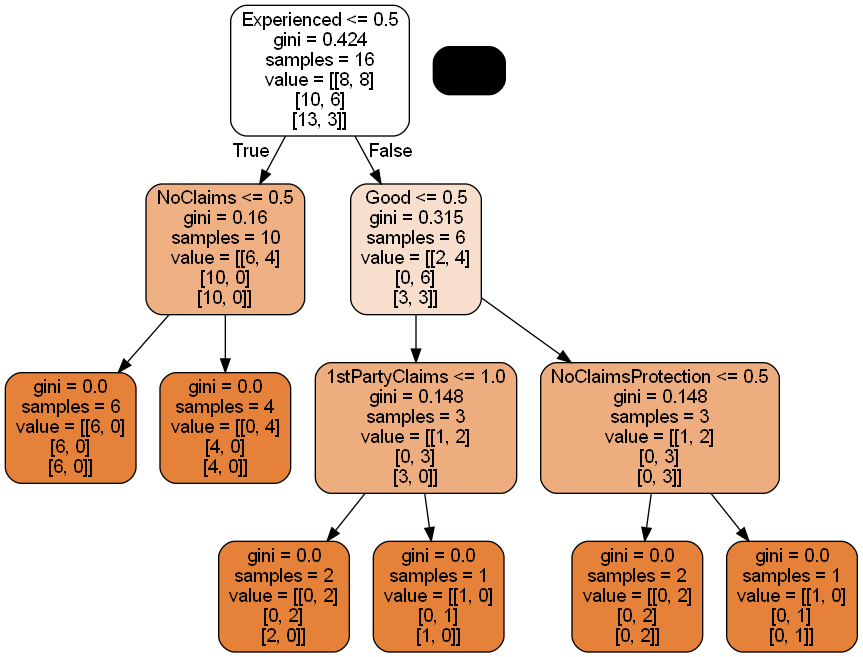

In [58]:
dot_data = StringIO()
tree.export_graphviz(classifier_fit, out_file=dot_data,
                    filled=True, rounded=True,
                    feature_names=X.columns, class_names=X.columns[7:])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png("./images/DecisionTree.png")
Image(graph.create_png())